# ベクトル
## introduction
数を１つ１つバラバラに考えるのではなくいくつかをひとまとめにして考えたものがベクトルである．

一般にn個の数$a_1, a_2, \cdots , a_n$を並べた組をn次元ベクトルと呼び，各々の数$a_1, a_2, \cdots , a_n$をその成分と呼ぶ．

成分を縦に並べた組を列ベクトルと呼び，横に並べた組を行ベクトルと呼ぶ．

列ベクトル：$\begin{bmatrix}
a_1  \\
\vdots \\
a_n \\
\end{bmatrix}
,
$
行ベクトル：$
\begin{bmatrix}
a_1 &\cdots&a_n \\
\end{bmatrix}
$

これは単に記法の問題である．
これ以降基本的にベクトルは列ベクトルを用いて表す．

このベクトルはボールド(太文字)一文字を用いて$\boldsymbol{a}$のように表すことがある．

n次元ベクトル全体の集合をn次元ベクトル空間と呼び，$R^n$で表す．

In [3]:
import numpy as np   # NumPyパッケージのインポート
import matplotlib.pyplot as plt

In [4]:
#列ベクトル
a=np.array([[1],[2],[3]])
a

array([[1],
       [2],
       [3]])

In [14]:
#行ベクトル
b=np.array([1,2])
b

array([1, 2])

In [16]:
#ベクトルの次元を求める
print("dimention of a =", len(a))
print("dimention of b =",len(b))
#ndimは配列の次元なのでここでは意味合いが異なるので不使用

dimention of a = 3
dimention of b = 2


## ベクトルの長さ
平面または空間において点Aから点Bに至る有向線分$\vec{AB}$もベクトルということにする．

この場合，点Aが始点，点Bが終点という．この線分ABの長さをベクトル$\vec{AB}$の大きさといい，$||\vec{AB}||$と表す．

もう少し一般的に解説をしてみよう．

n次元ベクトル$\boldsymbol{a}$を考える．この大きさ$||\boldsymbol{a}||$は三平方の定理を応用していけばいい．

$$||\boldsymbol{a}|| = \sqrt{{a_{1}}^2+{a_{2}}^2+\cdots+{a_{n}}^2}$$

In [19]:
#aとcのベクトルの大きさ(ノルム)を求める
#関数があるのでその恩恵を受けましょう
c = np.array([[2],[1]])
n = np.linalg.norm(a)
m = np.linalg.norm(c)
print(n)
print(m)

3.7416573867739413
2.23606797749979


In [20]:
#一応関数を使わずに確認してみる
n2 = (1+4+9)**0.5 #aの大きさ
m2 = (4+1)**0.5 #bの大きさ
print(n2)
print(m2)

3.7416573867739413
2.23606797749979


## ベクトルの相等
2つのベクトルの各成分が全て等しいときに，この2つのベクトルは等しいという．

つまり，$$\boldsymbol{a} = 
\begin{bmatrix}
a_1  \\
\vdots \\
a_n \\
\end{bmatrix},
\boldsymbol{b} = 
\begin{bmatrix}
b_1  \\
\vdots \\
b_n \\
\end{bmatrix}
$$
に関して
$$
\boldsymbol{a} = \boldsymbol{b} 
\begin{eqnarray}
\Leftrightarrow
  \begin{cases}
    a_1 &=& b_1  \\
    &\vdots& \\
    a_n &=& b_n
  \end{cases}
\end{eqnarray}
$$
のとき，$\boldsymbol{a},\boldsymbol{b}$は相等であるという．

すなわち，向きと大きさが等しいときに等しいと言えるのである．

Text([6.8], [5.7], 'D')

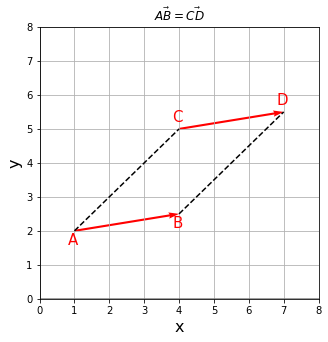

In [52]:
# 座標設定関数
def coordinate(axes, range_x, range_y, grid = True,
               xyline = True, xlabel = "x", ylabel = "y"):
    axes.set_xlabel(xlabel, fontsize = 16)
    axes.set_ylabel(ylabel, fontsize = 16)
    axes.set_xlim(range_x[0], range_x[1])
    axes.set_ylim(range_y[0], range_y[1])
    if grid == True:
        axes.grid()
    if xyline == True:
        axes.axhline(0, color = "gray")
        axes.axvline(0, color = "gray")

# ベクトル描画関数
def visual_vector(axes, loc, vector, color = "red"):
    axes.quiver(loc[0], loc[1],
              vector[0], vector[1], color = color,
              angles = 'xy', scale_units = 'xy', scale = 1)

# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
#Pythonでのエスケープシーケンスは[r]を用いる．
plt.title(r'$\vec{AB}=\vec{CD}$')

# 座標を設定
coordinate(ax, [0, 8], [0, 8])

#適当にベクトルを指定してみる
a = np.array([[3],[0.5]])

#始点を変えてaを描画
visual_vector(ax, [1, 2], a, "red")
visual_vector(ax, [4, 5], a, "red")

#始点同士，終点同士を点線結ぶ
ax.plot([1,4], [2, 5], ls = "--", color = "black")
ax.plot([1+a[0],4+a[0]], [2+a[1], 5+a[1]], ls = "--", color = "black")

ax.text(1-0.2,2-0.4, "A", color = "red", size = 15)
ax.text(1-0.2+a[0],2-0.4+a[1], "B", color = "red", size = 15)
ax.text(4-0.2,5+0.2, "C", color = "red", size = 15)
ax.text(4-0.2+a[0],5+0.2+a[1], "D", color = "red", size = 15)

## ベクトルの演算
### ベクトルの足し算，スカラー倍
2つのn次元ベクトル
$$\boldsymbol{a} = 
\begin{bmatrix}
a_1  \\
\vdots \\
a_n \\
\end{bmatrix},
\boldsymbol{b} = 
\begin{bmatrix}
b_1  \\
\vdots \\
b_n \\
\end{bmatrix}
$$
およびスカラー$k$に対して足し算，スカラー倍と呼ぶベクトル$\boldsymbol{a}+\boldsymbol{b},k\boldsymbol{a}$をそれぞれ次のように定義する．
$$\boldsymbol{a}+\boldsymbol{b} = \begin{bmatrix}
a_1+b_1  \\
\vdots \\
a_n + b_n\\
\end{bmatrix}
,
k\boldsymbol{a} = \begin{bmatrix}
k a_1  \\
\vdots \\
k a_n \\
\end{bmatrix}
$$

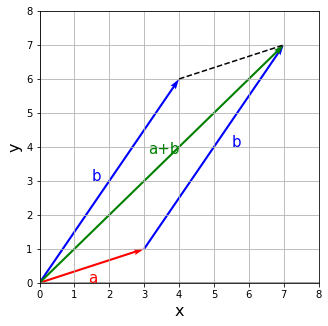

In [73]:
#ベクトルの足し算
a = np.array([[3],[1]])
b = np.array([[4],[6]])

# 座標設定関数
def coordinate(axes, range_x, range_y, grid = True,
               xyline = True, xlabel = "x", ylabel = "y"):
    axes.set_xlabel(xlabel, fontsize = 16)
    axes.set_ylabel(ylabel, fontsize = 16)
    axes.set_xlim(range_x[0], range_x[1])
    axes.set_ylim(range_y[0], range_y[1])
    if grid == True:
        axes.grid()
    if xyline == True:
        axes.axhline(0, color = "gray")
        axes.axvline(0, color = "gray")

# ベクトル描画関数
def visual_vector(axes, loc, vector, color = "red"):
    axes.quiver(loc[0], loc[1],
              vector[0], vector[1], color = color,
              angles = 'xy', scale_units = 'xy', scale = 1)

# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [0, 8], [0, 8])


# [0,0]を始点にaを描画
visual_vector(ax, [0, 0], a, "red")

# [0,0]を始点にbを描画
visual_vector(ax, [0,0], b, "blue")
# aの終点を始点にbを描画
visual_vector(ax, a, b, "blue")

# [0,0]を始点にa+bを描画
visual_vector(ax, [0, 0], a + b, "green")

ax.plot([b[0],b[0]+a[0]], [b[1], b[1]+a[1]], ls = "--", color = "black")

ax.text(a[0]/2-0.1,a[1]/2-0.5, "a", color = "red", size = 15)
ax.text(b[0]/2-0.5,b[1]/2, "b", color = "blue", size = 15)
ax.text(b[0]/2+a[0]+0.5,b[1]/2+a[1], "b", color = "blue", size = 15)
ax.text((a[0]+b[0])/2-0.4, (a[1]+b[1])/2+0.3, "a+b", color = "green", size = 15)

plt.show()

この図より，$\boldsymbol{a}$と$\boldsymbol{b}$の始点を合わせて書いた時，$\boldsymbol{a},\boldsymbol{b}$を2辺とする平行四辺形の対角線が$\boldsymbol{a}+\boldsymbol{b}$に相当する．

また，ベクトル$\boldsymbol{b}$を平行移動させてベクトル$\boldsymbol{a}$の終点に合わせた時，$\boldsymbol{a}$の始点と$\boldsymbol{b}$の終点を結んだ矢印も$\boldsymbol{a}+\boldsymbol{b}$に相当する．

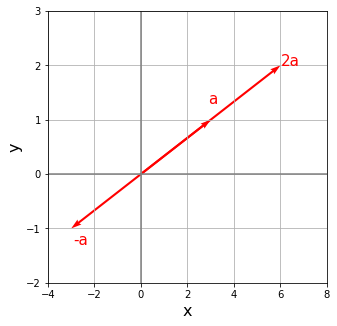

In [78]:
#ベクトルのスカラー倍
a2 = 2*a
a_rev = (-1)*a

# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-4, 8], [-2, 3])

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], a, "red")
ax.text(a[0]-0.1,a[1]+0.3, "a", color = "red", size = 15)

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], 2*a, "red")
ax.text(a2[0],a2[1], "2a", color = "red", size = 15)

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], (-1)*a, "red")
ax.text(a_rev[0]+0.1,a_rev[1]-0.3, "-a", color = "red", size = 15)

plt.show()

### 逆ベクトル，零ベクトル
ベクトル$\boldsymbol{a}$に対して，$(-1)\boldsymbol{a}$を$\boldsymbol{a}$の逆ベクトルと呼び，$- \boldsymbol{a}$で表す．
すなわち，
$$
\boldsymbol{a} = \begin{bmatrix}
a_1  \\
\vdots \\
a_n \\
\end{bmatrix}
に対して
-\boldsymbol{a} = \begin{bmatrix}
- a_1  \\
\vdots \\
- a_n \\
\end{bmatrix}
$$
となる．

つまりスカラー$k=-1$のとき特別に名前が付いていると考えるといいだろう．

ベクトル$\boldsymbol{a}$に対して，その逆ベクトル$- \boldsymbol{a}$はベクトル$\boldsymbol{a}$と長さが同じで向きが反対のベクトルである．

ここで文字式の演算で，ある文字とその負の文字の和をとると0になった．

これを数式で表すと以下のようになる．
$$x + (-x) = 0$$
つまり，0に相当するベクトルを別途定める必要がある．

そこで，全ての成分が0ベクトルであるベクトルを零ベクトル(ゼロベクトル)と定義し，$\boldsymbol{0}$で表す．

すなわち，
$$
\boldsymbol{0} = \begin{bmatrix}
0  \\
\vdots \\
0 \\
\end{bmatrix}
$$
となる．

以上より，逆ベクトルと零ベクトルに関して以下の等式が得られる．
$$\boldsymbol{a}+(-\boldsymbol{a}) = \boldsymbol{0}, \boldsymbol{a} + \boldsymbol{0} = \boldsymbol{a}$$

In [87]:
#ベクトルとその逆ベクトルの和は零ベクトルになる
vec_zero = a+a_rev
#長さを確認
len_a = np.linalg.norm(a)
len_a_rev =  np.linalg.norm(a_rev)
print("a is", a)
print("reverse a is",a_rev)
print("zero is",vec_zero)
print("length of a = ",len_a)
print("length of a_rev = ",len_a_rev)

a is [[3]
 [1]]
reverse a is [[-3]
 [-1]]
zero is [[0]
 [0]]
length of a =  3.1622776601683795
length of a_rev =  3.1622776601683795


In [88]:
#あるベクトルに零ベクトルを加えても何も変化がない
a_dash = a+vec_zero
print("a is",a)
print("a dash is",a_dash)

a is [[3]
 [1]]
a dash is [[3]
 [1]]


### ベクトルの引き算
2つのベクトル$\boldsymbol{a},\boldsymbol{b}$に対して引き算$\boldsymbol{a}-\boldsymbol{b}$を$\boldsymbol{a}+(-\boldsymbol{b})$によって定義する．

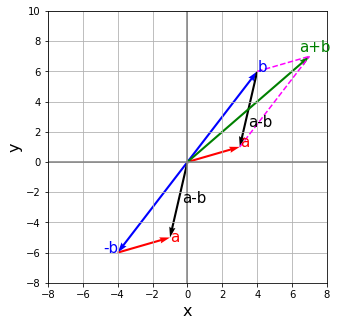

In [99]:
#ベクトルの引き算
# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-8, 8], [-8, 10])

visual_vector(ax, [0, 0], a, "red")
ax.text(a[0],a[1], "a", color = "red", size = 15)
visual_vector(ax, (-1)*b, a, "red")
ax.text((a[0]+(-1)*b[0]),(a[1]+(-1)*b[1]-0.3), "a", color = "red", size = 15)

visual_vector(ax, [0,0], b, "blue")
ax.text(b[0],b[1], "b", color = "blue", size = 15)
visual_vector(ax, [0,0], (-1)*b, "blue")
ax.text((-1)*b[0]-0.8,(-1)*b[1], "-b", color = "blue", size = 15)

visual_vector(ax, [0, 0], a - b, "black")

ax.plot([b[0],b[0]+a[0]], [b[1], b[1]+a[1]], ls = "--", color = "magenta")
ax.plot([a[0],b[0]+a[0]], [a[1], b[1]+a[1]], ls = "--", color = "magenta")

ax.text((a[0]-b[0])/2+0.2,(a[1]-b[1])/2-0.2, "a-b", color = "black", size = 15)
visual_vector(ax, b, a - b, "black")
ax.text((b[0]-a[0])/2+a[0],(b[1]-a[1])/2-0.2, "a-b", color = "black", size = 15)
visual_vector(ax, [0, 0], a + b, "green")
ax.text((a[0]+b[0])-0.6, (a[1]+b[1])+0.3, "a+b", color = "green", size = 15)

plt.show()

ベクトルの引き算$\boldsymbol{a}-\boldsymbol{b}$は2つのベクトルの始点を合わせ，$\boldsymbol{b}$から$\boldsymbol{a}$に戻る(引き算)イメージとすると捉えやすいだろう．

### 単位ベクトル
長さが1であるベクトルを単位ベクトルと呼ぶ．$\boldsymbol{a} \neq \boldsymbol{0}$のとき，
$$\boldsymbol{e} = \frac{1}{||a||}\boldsymbol{a}$$

Length of e :  1.0


Text([0.83205029], [0.3547002], 'e')

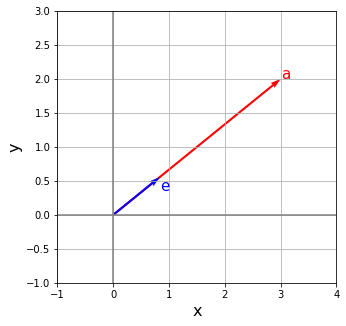

In [49]:
#単位ベクトル
e = (1/np.linalg.norm(a))*a
len_e = np.linalg.norm(e)
print("Length of e : ",len_e)
# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-1, 4], [-1, 3])

visual_vector(ax, [0, 0], a, "red")
ax.text(a[0],a[1], "a", color = "red", size = 15)
visual_vector(ax, [0, 0], e, "blue")
ax.text(e[0],e[1]-0.2, "e", color = "blue", size = 15)